<a href="https://colab.research.google.com/github/DimaKav/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module4-Model%20Diagnostics/Model_Diagnostics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%config InlineBackend.figure_format='retina'

In [64]:
##### Your Code Here #####

df_not_cleaned = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df['ln_price'] = np.log(df['SalePrice'])
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
df.drop(df.select_dtypes('object'),axis=1,inplace=True)
df.drop('LotFrontage',axis=1,inplace=True)
df.dropna(inplace=True, axis=0)
df.shape, df_not_cleaned.shape

((1452, 38), (1460, 81))

In [65]:
df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'ln_price'],
      dtype='object')

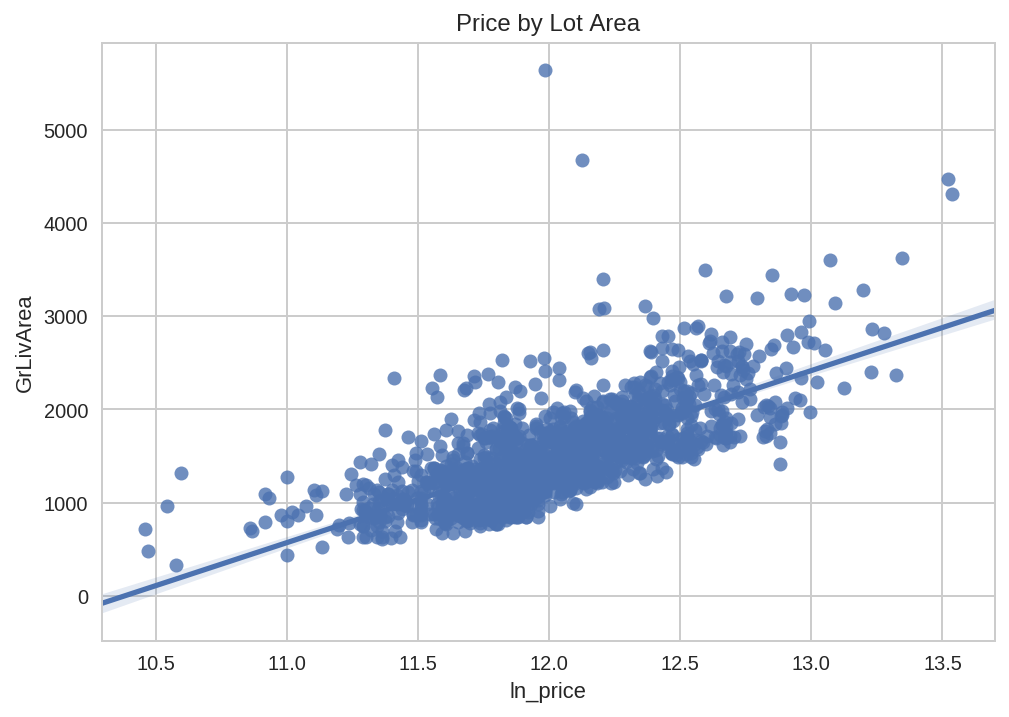

In [66]:
sns.regplot(df['ln_price'], df['GrLivArea']).set_title('Price by Lot Area');

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [67]:
##### Your Code Here #####
X = df.iloc[:,1:-2]
y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

def regression_statsmodel(y,X):
  model = sm.OLS(y, X).fit()
  predictions = model.predict(X) 
  print(model.summary())
  
regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     282.0
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:44:19   Log-Likelihood:                 741.73
No. Observations:                1452   AIC:                            -1415.
Df Residuals:                    1418   BIC:                            -1236.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            16.7630      5.988      2.799

**P-values > 0.05: MoSold
MiscVal
3SsnPorch
OpenPorchSF
GarageArea
MasVnrArea
BsmtFinSF2
GarageYrBlt
BedroomAbvGr
HalfBath
BsmtUnfSF
2ndFlrSF
LowQualFinSF
BsmtHalfBath**

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

A p-values of < 0.05 indicates that the predictor is likely to be a meaningful addition to the model because changes in the predictor's value are related to changed in the response variable.

To see if we should discard these variables, we would have to test for linear relationships with the dependent variable (price).

Except for MoSold, the p-values are higher as coefficients approach 0.

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [68]:
# Drop large p-values, they're not meaningful to our model
outliers = ["MoSold", 'MiscVal', '3SsnPorch', 'OpenPorchSF', 'GarageArea', 
     'MasVnrArea', 'BsmtFinSF2', 'GarageYrBlt', 'BedroomAbvGr',
     'HalfBath', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 
     'BsmtHalfBath']
df.drop(outliers, axis=1, inplace=True)
df.drop('1stFlrSF',axis=1,inplace=True)

# Drop rows that with outliers 5 or more stadard deviations from mean
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df.shape

(1421, 23)

In [69]:
X = df.iloc[:,1:-2]
y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     662.1
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:44:19   Log-Likelihood:                 955.87
No. Observations:                1421   AIC:                            -1872.
Df Residuals:                    1401   BIC:                            -1767.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.0582      5.056      2.978

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

Already did above

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

Index(['const', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'YrSold'],
      dtype='object') 




/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[2348559.6033102777,
 1.4604883052781041,
 1.4293677612499354,
 3.0903824208936674,
 1.5067296845422695,
 3.500455477110899,
 2.1613591587333083,
 2.1106384227958914,
 2.050772414639637,
 5.5218940851900165,
 1.8680676841686221,
 2.404568319000565,
 1.4608014510753449,
 3.926116321079581,
 1.4493333250431688,
 1.9394113042184882,
 1.1899687127459904,
 1.2318264630151219,
 1.080650624835643,
 nan,
 1.0210705948263517]

A few of the VIFs are ingfinity

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [0]:
df.drop('PoolArea',inplace=True,axis=1)

## 2.3 If you have varaibles with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
# Stanard errors do impoove.

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [73]:
def regression_statsmodel(y,X):
  model = sm.OLS(y, X).fit(cov_type='HC3')
  predictions = model.predict(X) 
  print(model.summary())
  
regression_statsmodel(y,X)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


LinAlgError: ignored

They go down slightly...

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

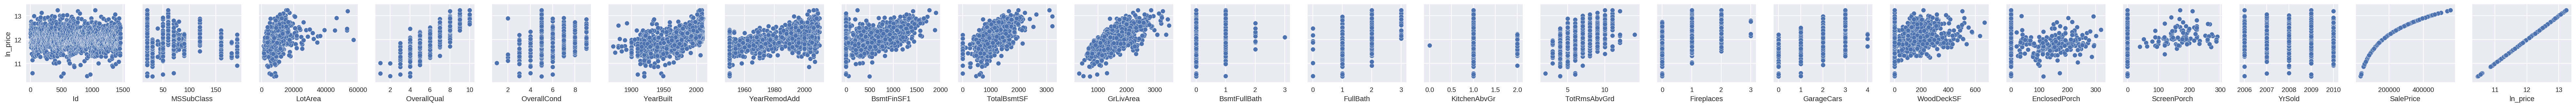

In [30]:
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=df.columns)

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

In [0]:
df.drop(['Id','SalePrice'],inplace=True,axis=1)

In [47]:
df.corr()['ln_price'].sort_values()

EnclosedPorch   -0.162289
KitchenAbvGr    -0.144166
MSSubClass      -0.071488
OverallCond     -0.039527
YrSold          -0.025701
ScreenPorch      0.096208
BsmtFullBath     0.229882
WoodDeckSF       0.340389
LotArea          0.350346
BsmtFinSF1       0.371087
Fireplaces       0.477370
TotRmsAbvGrd     0.535896
YearRemodAdd     0.578975
FullBath         0.597945
YearBuilt        0.609886
TotalBsmtSF      0.635135
GarageCars       0.680213
GrLivArea        0.717122
OverallQual      0.817455
ln_price         1.000000
Name: ln_price, dtype: float64

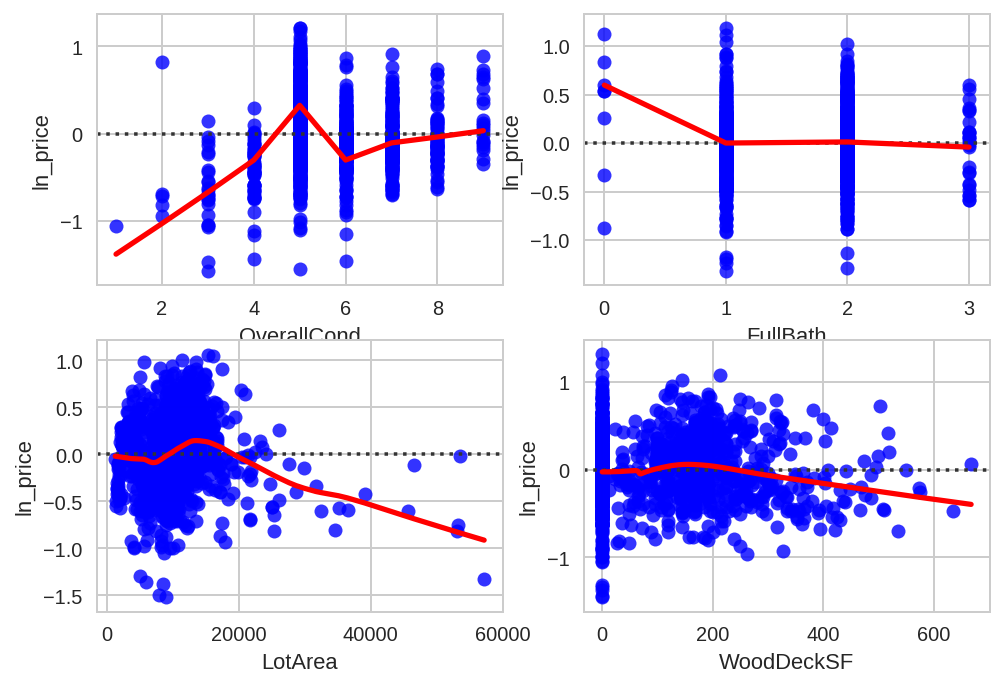

In [60]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(ncols=2, nrows=2)
sns.residplot(df['OverallCond'], y, lowess=True, color="r", ax=axs[0][0], scatter_kws={'color':'blue'})
sns.residplot(df['FullBath'], y, lowess=True, color="r", ax=axs[0][1], scatter_kws={'color':'blue'})
sns.residplot(df['LotArea'], y, lowess=True, color="r", ax=axs[1][0], scatter_kws={'color':'blue'})
sns.residplot(df['WoodDeckSF'], y, lowess=True, color="r", ax=axs[1][1], scatter_kws={'color':'blue'})

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

From our residual plots, I think we can suspect that those five might be candidates for polynomial forms. Lets generate some squared terms and then re-plot the residuals graphs and see if we get any improvement.

In [79]:
df['TotalBsmtSF_sq'] = df['TotalBsmtSF']**2
df['MSSubClass_sq'] = df['MSSubClass']**2
df['LotArea_sq'] = df['LotArea']**2
df['WoodDeckSF_sq'] = df['WoodDeckSF']**2
df['OverallCond_sq'] = df['OverallCond']**2

# y = df['ln_price']
# df.drop('ln_price',inplace=True,axis=1)
X = df.iloc[:,1:]
X = sm.add_constant(X)
regression_statsmodel(y,X)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     417.7
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:45:55   Log-Likelihood:                 969.50
No. Observations:                1421   AIC:                            -1889.
Df Residuals:                    1396   BIC:                            -1758.
Df Model:                          24                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0619      5.139      2.

The coefficients of my engineered polynomial terms all have negative coefficients and the model did improve in R^2. Amazing how much polynomial features can improve a model.